### Importes Básicos

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import math

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Pipeline and Column Transformers
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn import set_config
set_config(display = "diagram")

# Scaling
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

# Cross Validation
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

# Unsupervised Learning
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans 

# STATISTICS
from statsmodels.graphics.gofplots import qqplot
# This function plots your sample against a Normal distribution, 
# to see whether your sample is normally distributed or not

Criação do Dataframe

In [2]:
df = pd.read_csv('NBA_database.csv', index_col=0)
df

Team  Season            Player  Age   G    GS    MP   FG   FGA    FG%  \
0      MIA    2024       Bam Adebayo   26  71  71.0  2416  530  1017  0.521   
1      MIA    2024  Jaime Jaquez Jr.   22  75  20.0  2113  341   697  0.489   
2      MIA    2024      Jimmy Butler   34  60  60.0  2042  396   793  0.499   
3      MIA    2024   Duncan Robinson   29  68  36.0  1905  304   675  0.450   
4      MIA    2024      Caleb Martin   28  64  23.0  1756  241   559  0.431   
...    ...     ...               ...  ...  ..   ...   ...  ...   ...    ...   
22677  HOU    1980      John Shumate   27  29   NaN   332   34    64  0.531   
22678  HOU    1980      Dwight Jones   27  21   NaN   278   50   119  0.420   
22679  HOU    1980      Paul Mokeski   23  12   NaN   113   11    33  0.333   
22680  HOU    1980        Rudy White   26   9   NaN   106   13    24  0.542   
22681  HOU    1980    Alonzo Bradley   26  22   NaN    96   17    48  0.354   

        3P  3PA    3P%   2P  2PA    2P%   eFG%   FT  FTA    FT%  ORB  DRB  \
0       15   42  0.357  515  975  0.528  0.529  292  387  0.755  159  578   
1       65  202  0.322  276  495  0.558  0.536  142  175  0.811   82  203   
2       60  145  0.414  336  648  0.519  0.537  394  459  0.858  105  213   
3      187  473  0.395  117  202  0.579  0.589   80   90  0.889   15  158   
4       81  232  0.349  160  327  0.489  0.504   77   99  0.778   74  207   
...    ...  ...    ...  ...  ...    ...    ...  ...  ...    ...  ...  ...   
22677    0    0    NaN   34   64  0.531  0.531   33   44  0.750   25   54   
22678    0    0    NaN   50  119  0.420  0.420   27   36  0.750   31   41   
22679    0    0    NaN   11   33  0.333  0.333    7    9  0.778   14   15   
22680    0    0    NaN   13   24  0.542  0.542   10   13  0.769    0    9   
22681    1    1  1.000   16   47  0.340  0.365    6    9  0.667    2    4   

       TRB  AST  STL  BLK  TOV   PF   PTS  
0      737  278   81   66  162  159  1367  
1      285  195   77   20  110  167   889  
2      318  298   79   17  102   68  1246  
3      173  192   46   16   95  163   875  
4      281  143   47   29   77  126   640  
...    ...  ...  ...  ...  ...  ...   ...  
22677   79   23    8    9   27   39   101  
22678   72   11    4    5   20   48   127  
22679   29    2    1    6   10   24    29  
22680    9    5    5    0    8    8    36  
22681    6    3    3    0    8    9    41  

[21716 rows x 29 columns]

Elminação de Na

In [3]:
df = df.fillna(0)

# Tratamento inicial dos dados

## Defininado jogadores com minutagem relevante

Nos últimos 45 anos a regra da NBA foi de que cada time jogaria 82 vezes, entretanto tivemos 4 tempordas que não contaram com esse número de jogos por time

1) **1999** -> Temporada com apenas 50 jogos por conta de problemas nas negociações salariais

2) **2012** -> Temporada com apenas 66 jogos por conta de problemas nas negociações salariais

3) **2020** -> Temporada com apenas 72 jogos por conta da COVID-19

4) **2021** -> Temporada com apenas 72 jogos por conta da COVID-19

### Número de jogos por times

In [4]:
games_per_seasonb_= (df.groupby('Season').sum()['MP'] #-> total de minutos jogados
         /df.groupby('Season').nunique()['Team'] #-> Número de times por temporada
         /5 #-> jogadores em quadra
         /48)

print(games_per_seasonb_.sort_values()[0:6])
games_season_dict = games_per_seasonb_.to_dict()

Season
1999    50.380747
2012    66.536250
2020    71.118611
2021    72.430278
1994    82.378086
1988    82.434783
dtype: float64


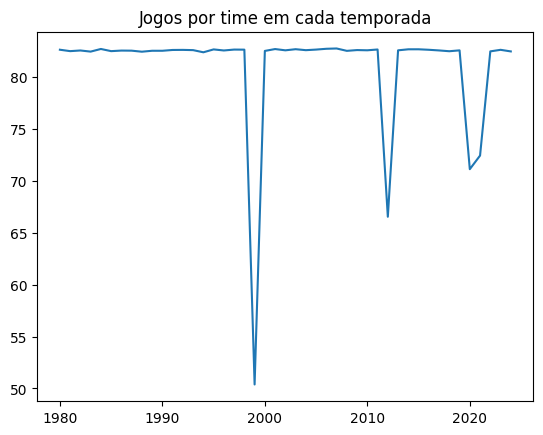

In [5]:
plt.plot(df.groupby('Season').sum()['MP'] #-> total de minutos jogados
         /df.groupby('Season').nunique()['Team'] #-> Número de times por temporada
         /5 #-> jogadores em quadra
         /48 #-> minutos por jogo
        )
plt.title("Jogos por time em cada temporada");




**Além disse o número de times por temporada tambvém foi diferente nos últimos anos**



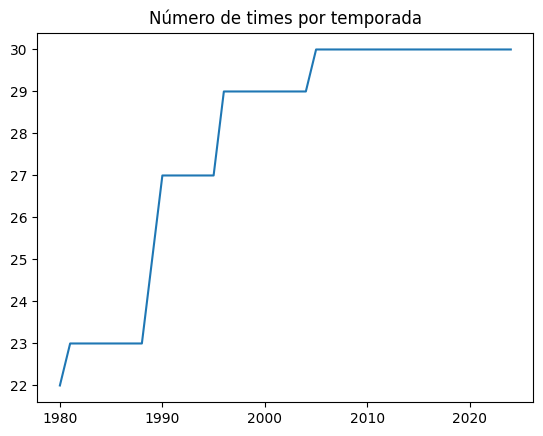

In [6]:
plt.plot(df.groupby('Season').nunique()['Team']) #-> Número de times por temporada)
plt.title("Número de times por temporada");

### Unificação dos jogadores que jogaramem mais de um clube

Alguns jogadores jogam em mais de um clube em uma temporada

Para um analise de agrupamento é melhor juntar a temporada em diferentes clubes como em uma só

In [7]:
df = df.groupby(['Season', 'Player'],as_index=False).sum()

 Por conta do Group By as estatíticas de FG%, 3P%, FT% e eFG% precisam re recalculadas

In [8]:
#Corrigindo as estatísticas que ficaram erradas
df['FG%'] = df['FG'] / df['FGA']
df['3P%'] = df['3P'] / df['3PA']
df['2P%'] = df['2P'] / df['2PA']
df['FT%'] = df['FT'] / df['FTA']
df['eFG%'] = (df['FG'] + 0.5 * df['3P'])/ df['FGA']

In [9]:
df = df.fillna(0)

### Validação dos jogadores com minutagem significativa

Para selecionar apenas os jogadores com minutagem relevantes vamos agrupar as temporadas e buscar o pareto de minutagem por número de jogadores

In [10]:
df = df.sort_values(['Season', 'MP'], ascending=[True, False])

In [11]:
# Criação das colunas de apoio para selecionar jogadores de minutagem relevante
df['aux'] = 1
df['MP_Season_cumsum'] = df.groupby('Season')['MP'].transform(lambda x: x.cumsum() / x.sum())
df['%_Season_players'] = df.groupby('Season')['aux'].transform(lambda x: x.cumsum() / x.sum())
df.drop(columns='aux', inplace=True)
df

Season               Player  Age    G    GS    MP   FG   FGA       FG%  \
95       1980       George Johnson   54  156   0.0  4057  557  1192  0.467282   
199      1980           Norm Nixon   24   82  82.0  3226  624  1209  0.516129   
84       1980          Elvin Hayes   34   81   0.0  3183  761  1677  0.453787   
18       1980      Bill Cartwright   22   82  82.0  3150  665  1215  0.547325   
151      1980  Kareem Abdul-Jabbar   32   82   0.0  3143  835  1383  0.603760   
...       ...                  ...  ...  ...   ...   ...  ...   ...       ...   
19037    2024       Jalen Crutcher   24    1   0.0     3    0     1  0.000000   
19184    2024      Malcolm Cazalon   22    1   0.0     3    0     0  0.000000   
18951    2024    Dmytro Skapintsev   25    2   0.0     2    0     1  0.000000   
19065    2024        Javonte Smart   24    1   0.0     1    0     0  0.000000   
19122    2024       Justin Jackson   28    2   0.0     1    0     0  0.000000   

       3P  3PA       3P%   2P   2PA       2P%      eFG%   FT  FTA       FT%  \
95      2   10  0.200000  555  1182  0.469543  0.468121  237  315  0.752381   
199     1    8  0.125000  623  1201  0.518734  0.516543  197  253  0.778656   
84      3   13  0.230769  758  1664  0.455529  0.454681  334  478  0.698745   
18      0    0  0.000000  665  1215  0.547325  0.547325  451  566  0.796820   
151     0    1  0.000000  835  1382  0.604197  0.603760  364  476  0.764706   
...    ..  ...       ...  ...   ...       ...       ...  ...  ...       ...   
19037   0    0  0.000000    0     1  0.000000  0.000000    0    0  0.000000   
19184   0    0  0.000000    0     0  0.000000  0.000000    0    0  0.000000   
18951   0    0  0.000000    0     1  0.000000  0.000000    0    0  0.000000   
19065   0    0  0.000000    0     0  0.000000  0.000000    0    0  0.000000   
19122   0    0  0.000000    0     0  0.000000  0.000000    0    0  0.000000   

       ORB  DRB   TRB  AST  STL  BLK  TOV   PF   PTS  MP_Season_cumsum  \
95     382  804  1186  330  137  325  347  572  1353          0.009300   
199     52  177   229  642  147   14  288  241  1446          0.016694   
84     269  627   896  129   62  189  215  309  1859          0.023990   
18     194  532   726  165   48  101  222  279  1781          0.031211   
151    190  696   886  371   81  280  297  216  2034          0.038415   
...    ...  ...   ...  ...  ...  ...  ...  ...   ...               ...   
19037    0    0     0    0    0    0    0    0     0          0.999988   
19184    0    0     0    0    0    0    0    0     0          0.999993   
18951    0    0     0    0    0    0    0    0     0          0.999997   
19065    0    0     0    0    0    0    0    0     0          0.999998   
19122    0    0     0    0    0    0    0    0     0          1.000000   

       %_Season_players  
95             0.003497  
199            0.006993  
84             0.010490  
18             0.013986  
151            0.017483  
...                 ...  
19037          0.993007  
19184          0.994755  
18951          0.996503  
19065          0.998252  
19122          1.000000  

[19375 rows x 30 columns]

### Gráfico de pareto por temporada

Explorando a base de dados vemos que 80% dos minutos são jogados por apenas 44% dos jogadores

In [12]:
import math

season = df['Season'].unique()
dfnrows = math.ceil(len(season)/2)

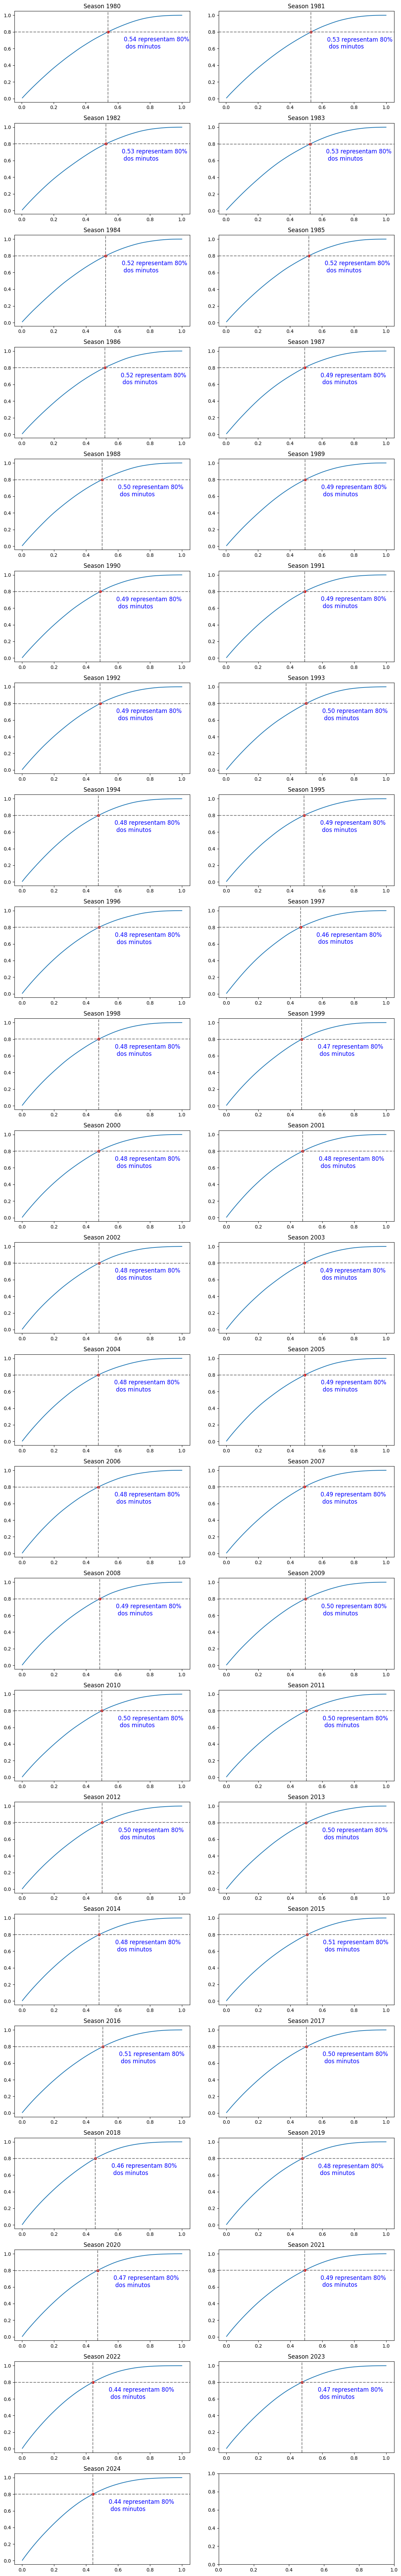

In [13]:
fig, axs = plt.subplots(nrows=dfnrows,ncols =2, figsize=(12, 75))
for n, i in  enumerate(season):
    
    # Definindo qual será o eixo do gráfico
    row = n // 2
    col_idx = n % 2
    
    # Plotando o gráfico
    temp_df = df[df['Season'] == int(i)]
    axs[row, col_idx].plot(temp_df['%_Season_players'], temp_df['MP_Season_cumsum'])
    axs[row, col_idx].set_title(f'Season {i}')  # Adiciona um título para cada subplot
    
    # Definindo quem representa o 80# dos minutos
    _80_ = temp_df.iloc[(temp_df['MP_Season_cumsum']-0.8).abs().argsort()[:1]]
    
    #Adicionando o ponto de esquilíbrio e adicionando marcadores
    axs[row, col_idx].plot(_80_['%_Season_players'], _80_['MP_Season_cumsum'], color='red', marker ='p')
    axs[row, col_idx].axvline(x=_80_['%_Season_players'].values[0], color='gray', linestyle='--')  # Linha vertical
    axs[row, col_idx].axhline(y=_80_['MP_Season_cumsum'].values[0], color='gray', linestyle='--')
    
    #Adicionando texto nos gráficos
    axs[row, col_idx].text(
        _80_['%_Season_players'].values[0] + 0.1,  # Posição no eixo x (levemente deslocada para a direita)
        _80_['MP_Season_cumsum'].values[0] - 0.2,  # Posição no eixo y (levemente deslocada para cima)
        f"{_80_['%_Season_players'].values[0]:.2f} representam 80% \n dos minutos",  # Texto a ser exibido
        fontsize=12,
        color='blue'
    )
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show()

Selecionando apenas os jagadores com minutagens significativas

In [14]:
df = df[df['MP_Season_cumsum']<0.8].copy()
df.drop(columns='%_Season_players', inplace = True)
df.drop(columns='MP_Season_cumsum', inplace = True)

## Tratado as tentativas de 3 pontos

Jogadores com muitas poucas tentatvas de bolas de 3 podem ter outliers por conta do baixo número de tentativas de bolas de 3

Para definir o corte de número de bolas tentadas, foram testados 2 métodos

### Testando o pareto pra entender o perfil dos chutes de  3 nos últimos anos

In [15]:
df = df.sort_values(['Season', '3PA'], ascending=[True, False])

In [16]:
df['aux'] = 1
df['3PA_Season_cumsum'] = df.groupby('Season')['3PA'].transform(lambda x: x.cumsum() / x.sum())
df['%_Season_players'] = df.groupby('Season')['aux'].transform(lambda x: x.cumsum() / x.sum())
df.drop(columns='aux', inplace=True)
df

Season                Player  Age   G    GS    MP   FG   FGA       FG%  \
38       1980          Brian Taylor   28  78   0.0  2754  418   895  0.467039   
225      1980            Rick Barry   35  72   0.0  1816  325   771  0.421530   
51       1980            Chris Ford   31  73  73.0  2115  330   709  0.465444   
195      1980           Mike Newlin   31  78   0.0  2510  611  1329  0.459744   
160      1980            Larry Bird   23  82  82.0  2955  693  1463  0.473684   
...       ...                   ...  ...  ..   ...   ...  ...   ...       ...   
19146    2024          Kevon Looney   27  74  36.0  1195  139   233  0.596567   
19337    2024  Trayce Jackson-Davis   23  68  16.0  1130  233   332  0.701807   
18913    2024        Daniel Gafford   50  74  66.0  1815  348   480  0.725000   
19015    2024           Ivica Zubac   26  68  68.0  1794  337   519  0.649326   
19035    2024          Jakob Poeltl   28  50  50.0  1319  248   378  0.656085   

       3P  3PA       3P%   2P   2PA       2P%      eFG%   FT  FTA       FT%  \
38     90  239  0.376569  328   656  0.500000  0.517318  130  162  0.802469   
225    73  221  0.330317  252   550  0.458182  0.468872  143  153  0.934641   
51     70  164  0.426829  260   545  0.477064  0.514810   86  114  0.754386   
195    45  152  0.296053  566  1177  0.480884  0.476674  367  415  0.884337   
160    58  143  0.405594  635  1320  0.481061  0.493506  301  360  0.836111   
...    ..  ...       ...  ...   ...       ...       ...  ...  ...       ...   
19146   0    1  0.000000  139   232  0.599138  0.596567   56   83  0.674699   
19337   0    1  0.000000  233   331  0.703927  0.701807   74  132  0.560606   
18913   0    0  0.000000  348   480  0.725000  0.725000  118  175  0.674286   
19015   0    0  0.000000  337   519  0.649326  0.649326  120  166  0.722892   
19035   0    0  0.000000  248   378  0.656085  0.656085   59  107  0.551402   

       ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  3PA_Season_cumsum  \
38      76  112  188  335  147   25  141  246  1056           0.061110   
225     53  183  236  268   80   28  152  182   866           0.117617   
51      77  104  181  215  111   27  105  178   816           0.159550   
195    101  163  264  314  115    4  231  195  1634           0.198415   
160    216  636  852  370  143   53  263  279  1745           0.234978   
...    ...  ...  ...  ...  ...  ...  ...  ...   ...                ...   
19146  143  276  419  133   28   29   50  155   334           0.999986   
19337  135  206  341   82   29   76   49  108   540           1.000000   
18913  195  367  562  115   65  153   74  227   814           1.000000   
19015  196  430  626   93   22   83   79  180   794           1.000000   
19035  146  283  429  127   35   76   77  149   555           1.000000   

       %_Season_players  
38             0.006536  
225            0.013072  
51             0.019608  
195            0.026144  
160            0.032680  
...                 ...  
19146          0.984190  
19337          0.988142  
18913          0.992095  
19015          0.996047  
19035          1.000000  

[9446 rows x 30 columns]

In [17]:
import math

season = df['Season'].unique()
dfnrows = math.ceil(len(season)/2)

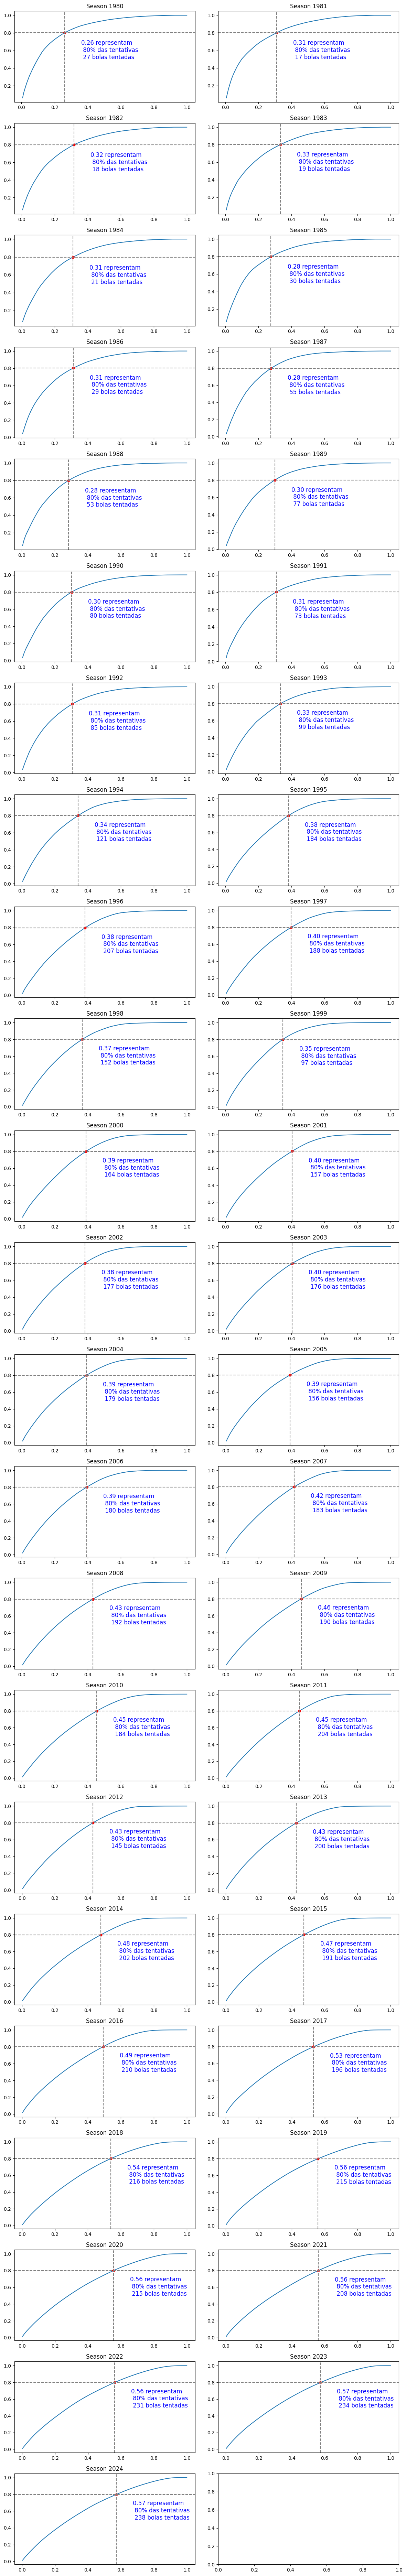

In [18]:
fig, axs = plt.subplots(nrows=dfnrows,ncols =2, figsize=(12, 75))
for n, i in  enumerate(season):
    
    # Definindo qual será o eixo do gráfico
    row = n // 2
    col_idx = n % 2
    
    # Plotando o gráfico
    temp_df = df[df['Season'] == int(i)]
    axs[row, col_idx].plot(temp_df['%_Season_players'], temp_df['3PA_Season_cumsum'])
    axs[row, col_idx].set_title(f'Season {i}')  # Adiciona um título para cada subplot
    
    # Definindo quem representa o 80# dos minutos
    _80_ = temp_df.iloc[(temp_df['3PA_Season_cumsum']-0.8).abs().argsort()[:1]]
    
    #Adicionando o ponto de esquilíbrio e adicionando marcadores
    axs[row, col_idx].plot(_80_['%_Season_players'], _80_['3PA_Season_cumsum'], color='red', marker ='p')
    axs[row, col_idx].axvline(x=_80_['%_Season_players'].values[0], color='gray', linestyle='--')  # Linha vertical
    axs[row, col_idx].axhline(y=_80_['3PA_Season_cumsum'].values[0], color='gray', linestyle='--')
    
    #Adicionando texto nos gráficos
    axs[row, col_idx].text(
        _80_['%_Season_players'].values[0] + 0.1,  # Posição no eixo x (levemente deslocada para a direita)
        _80_['3PA_Season_cumsum'].values[0] - 0.3,  # Posição no eixo y (levemente deslocada para cima)
        f"{_80_['%_Season_players'].values[0]:.2f} representam \n 80% das tentativas\n {_80_['3PA'].values[0]} bolas tentadas",  # Texto a ser exibido
        fontsize=12,
        color='blue'
    )
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show()

In [19]:
df.drop(columns='%_Season_players', inplace = True)
df.drop(columns='3PA_Season_cumsum', inplace = True)

### Eliminação 1 a 1 para checar em ponto a curva de bola 3P% normaliza

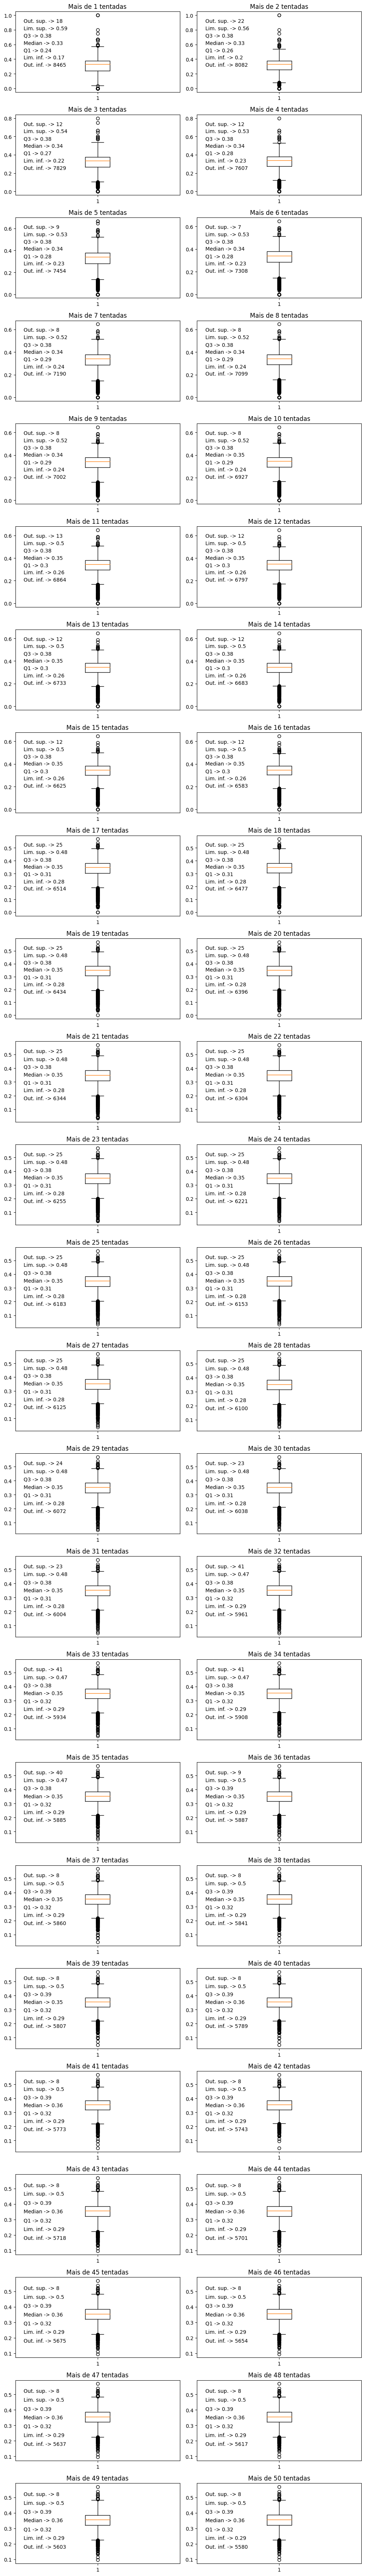

In [20]:
fig, axs = plt.subplots(nrows=25, ncols=2, figsize=(10, 70))
for n, _3pa_ in enumerate(np.arange(1,51)):
    
    #Descrevendo o eixo
    row = n // 2
    col_idx = n % 2
    
    #Criação de uma DF temporária
    temp_df = df[df['3PA'] > _3pa_]
    
    #Criação dos gráficos
    axs[row, col_idx].boxplot(temp_df['3P%'])
    axs[row, col_idx].set_title(f'Mais de {_3pa_} tentadas')
    
    #Calculando dados do boxplot
    q1 = round(temp_df['3P%'].quantile(0.25),2)
    median = round(temp_df['3P%'].quantile(0.50),2)
    q3 = round(temp_df['3P%'].quantile(0.75),2)
    iqr = q3 - q1
    limite_superior = round(q3 + 1.5*iqr,2)
    outliers_superior = temp_df[temp_df['3P%'] > limite_superior]['3P'].count()
    limite_inferior = round(q3 - 1.5*iqr,2)
    outliers_inferior = temp_df[temp_df['3P%'] < limite_superior]['3P'].count()    
    
    # Adicionando texto no gráfico
    col_max = temp_df['3P%'].max()
    axs[row, col_idx].text(0.55,((col_max)-0.1*col_max),f"Out. sup. -> {outliers_superior}")        
    axs[row, col_idx].text(0.55,((col_max)-0.2*col_max),f"Lim. sup. -> {limite_superior}")    
    axs[row, col_idx].text(0.55,((col_max)-0.3*col_max),f"Q3 -> {q3}")
    axs[row, col_idx].text(0.55,((col_max)-0.4*col_max),f"Median -> {median}")
    axs[row, col_idx].text(0.55,((col_max)-0.5*col_max),f"Q1 -> {q1}")
    axs[row, col_idx].text(0.55,((col_max)-0.6*col_max),f"Lim. inf. -> {limite_inferior}")
    axs[row, col_idx].text(0.55,((col_max)-0.7*col_max),f"Out. inf. -> {outliers_inferior}")    
    
plt.tight_layout()  # Ajusta o layout para não sobrepor elementos
plt.show() 

### O Ponto de corte foi de 30 tentativas de bolas de 3

In [21]:
df['3P%'] = np.where(df['3PA'] > 29, df['3P%'], 0 )
df['3P'] = np.where(df['3PA'] > 29, df['3P'], 0 )
df['3PA'] = np.where(df['3PA'] > 29, df['3PA'], 0 )

In [22]:
df.fillna(0)

Season                Player  Age   G    GS    MP   FG   FGA       FG%  \
38       1980          Brian Taylor   28  78   0.0  2754  418   895  0.467039   
225      1980            Rick Barry   35  72   0.0  1816  325   771  0.421530   
51       1980            Chris Ford   31  73  73.0  2115  330   709  0.465444   
195      1980           Mike Newlin   31  78   0.0  2510  611  1329  0.459744   
160      1980            Larry Bird   23  82  82.0  2955  693  1463  0.473684   
...       ...                   ...  ...  ..   ...   ...  ...   ...       ...   
19146    2024          Kevon Looney   27  74  36.0  1195  139   233  0.596567   
19337    2024  Trayce Jackson-Davis   23  68  16.0  1130  233   332  0.701807   
18913    2024        Daniel Gafford   50  74  66.0  1815  348   480  0.725000   
19015    2024           Ivica Zubac   26  68  68.0  1794  337   519  0.649326   
19035    2024          Jakob Poeltl   28  50  50.0  1319  248   378  0.656085   

       3P  3PA       3P%   2P   2PA       2P%      eFG%   FT  FTA       FT%  \
38     90  239  0.376569  328   656  0.500000  0.517318  130  162  0.802469   
225    73  221  0.330317  252   550  0.458182  0.468872  143  153  0.934641   
51     70  164  0.426829  260   545  0.477064  0.514810   86  114  0.754386   
195    45  152  0.296053  566  1177  0.480884  0.476674  367  415  0.884337   
160    58  143  0.405594  635  1320  0.481061  0.493506  301  360  0.836111   
...    ..  ...       ...  ...   ...       ...       ...  ...  ...       ...   
19146   0    0  0.000000  139   232  0.599138  0.596567   56   83  0.674699   
19337   0    0  0.000000  233   331  0.703927  0.701807   74  132  0.560606   
18913   0    0  0.000000  348   480  0.725000  0.725000  118  175  0.674286   
19015   0    0  0.000000  337   519  0.649326  0.649326  120  166  0.722892   
19035   0    0  0.000000  248   378  0.656085  0.656085   59  107  0.551402   

       ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
38      76  112  188  335  147   25  141  246  1056  
225     53  183  236  268   80   28  152  182   866  
51      77  104  181  215  111   27  105  178   816  
195    101  163  264  314  115    4  231  195  1634  
160    216  636  852  370  143   53  263  279  1745  
...    ...  ...  ...  ...  ...  ...  ...  ...   ...  
19146  143  276  419  133   28   29   50  155   334  
19337  135  206  341   82   29   76   49  108   540  
18913  195  367  562  115   65  153   74  227   814  
19015  196  430  626   93   22   83   79  180   794  
19035  146  283  429  127   35   76   77  149   555  

[9446 rows x 28 columns]

## Conversão dos dados de total para por jogo

Manter os dados em totais ao invés de por jogos pune jogadores que sofrem com lesão duas vezes

1) **Diminuindo seus totais**

2) **Diminuindo sua disponibilidade**

Para Lidar com isso os dados foram convertidos para por jogo ao invés de total

### Criação de variável de minutos jogados

In [23]:
df['Possible Minutes'] = df.loc[:, 'Season'].map(games_season_dict)*48
df['MP/Possible Minutes'] = df.loc[:, 'MP'] / df.loc[:, 'Possible Minutes']
df.drop(columns='Possible Minutes', inplace = True)

### Convertendo os dados para por jogo

In [24]:
per_game_cols = [x for x in df.columns.to_list()[5:-1] if x[-1] != "%"]
for i in per_game_cols:
    df[i] = df[i]/df['G']
df

Season                Player  Age   G    GS         MP        FG  \
38       1980          Brian Taylor   28  78   0.0  35.307692  5.358974   
225      1980            Rick Barry   35  72   0.0  25.222222  4.513889   
51       1980            Chris Ford   31  73  73.0  28.972603  4.520548   
195      1980           Mike Newlin   31  78   0.0  32.179487  7.833333   
160      1980            Larry Bird   23  82  82.0  36.036585  8.451220   
...       ...                   ...  ...  ..   ...        ...       ...   
19146    2024          Kevon Looney   27  74  36.0  16.148649  1.878378   
19337    2024  Trayce Jackson-Davis   23  68  16.0  16.617647  3.426471   
18913    2024        Daniel Gafford   50  74  66.0  24.527027  4.702703   
19015    2024           Ivica Zubac   26  68  68.0  26.382353  4.955882   
19035    2024          Jakob Poeltl   28  50  50.0  26.380000  4.960000   

             FGA       FG%        3P       3PA       3P%        2P        2PA  \
38     11.474359  0.467039  1.153846  3.064103  0.376569  4.205128   8.410256   
225    10.708333  0.421530  1.013889  3.069444  0.330317  3.500000   7.638889   
51      9.712329  0.465444  0.958904  2.246575  0.426829  3.561644   7.465753   
195    17.038462  0.459744  0.576923  1.948718  0.296053  7.256410  15.089744   
160    17.841463  0.473684  0.707317  1.743902  0.405594  7.743902  16.097561   
...          ...       ...       ...       ...       ...       ...        ...   
19146   3.148649  0.596567  0.000000  0.000000  0.000000  1.878378   3.135135   
19337   4.882353  0.701807  0.000000  0.000000  0.000000  3.426471   4.867647   
18913   6.486486  0.725000  0.000000  0.000000  0.000000  4.702703   6.486486   
19015   7.632353  0.649326  0.000000  0.000000  0.000000  4.955882   7.632353   
19035   7.560000  0.656085  0.000000  0.000000  0.000000  4.960000   7.560000   

            2P%      eFG%        FT       FTA       FT%       ORB       DRB  \
38     0.500000  0.517318  1.666667  2.076923  0.802469  0.974359  1.435897   
225    0.458182  0.468872  1.986111  2.125000  0.934641  0.736111  2.541667   
51     0.477064  0.514810  1.178082  1.561644  0.754386  1.054795  1.424658   
195    0.480884  0.476674  4.705128  5.320513  0.884337  1.294872  2.089744   
160    0.481061  0.493506  3.670732  4.390244  0.836111  2.634146  7.756098   
...         ...       ...       ...       ...       ...       ...       ...   
19146  0.599138  0.596567  0.756757  1.121622  0.674699  1.932432  3.729730   
19337  0.703927  0.701807  1.088235  1.941176  0.560606  1.985294  3.029412   
18913  0.725000  0.725000  1.594595  2.364865  0.674286  2.635135  4.959459   
19015  0.649326  0.649326  1.764706  2.441176  0.722892  2.882353  6.323529   
19035  0.656085  0.656085  1.180000  2.140000  0.551402  2.920000  5.660000   

             TRB       AST       STL       BLK       TOV        PF        PTS  \
38      2.410256  4.294872  1.884615  0.320513  1.807692  3.153846  13.538462   
225     3.277778  3.722222  1.111111  0.388889  2.111111  2.527778  12.027778   
51      2.479452  2.945205  1.520548  0.369863  1.438356  2.438356  11.178082   
195     3.384615  4.025641  1.474359  0.051282  2.961538  2.500000  20.948718   
160    10.390244  4.512195  1.743902  0.646341  3.207317  3.402439  21.280488   
...          ...       ...       ...       ...       ...       ...        ...   
19146   5.662162  1.797297  0.378378  0.391892  0.675676  2.094595   4.513514   
19337   5.014706  1.205882  0.426471  1.117647  0.720588  1.588235   7.941176   
18913   7.594595  1.554054  0.878378  2.067568  1.000000  3.067568  11.000000   
19015   9.205882  1.367647  0.323529  1.220588  1.161765  2.647059  11.676471   
19035   8.580000  2.540000  0.700000  1.520000  1.540000  2.980000  11.100000   

       MP/Possible Minutes  
38                0.694402  
225               0.457892  
51                0.533283  
195               0.632879  
160               0.745083  
...                    ...  
19146   

## Entendento o Perfil das variáveis

Criando Boxplots e histogramas é possível entender o perfil das variáveois e decidir como elas devem ser escalonadas

1) **Histogramas** -> Para entender se as variáveis tem distribuição normal

2) **Boxplot** -> Para entender a presença e imortância das variáveis

In [25]:
columns_hist = df.columns.to_list()[5:]

### Histogramas

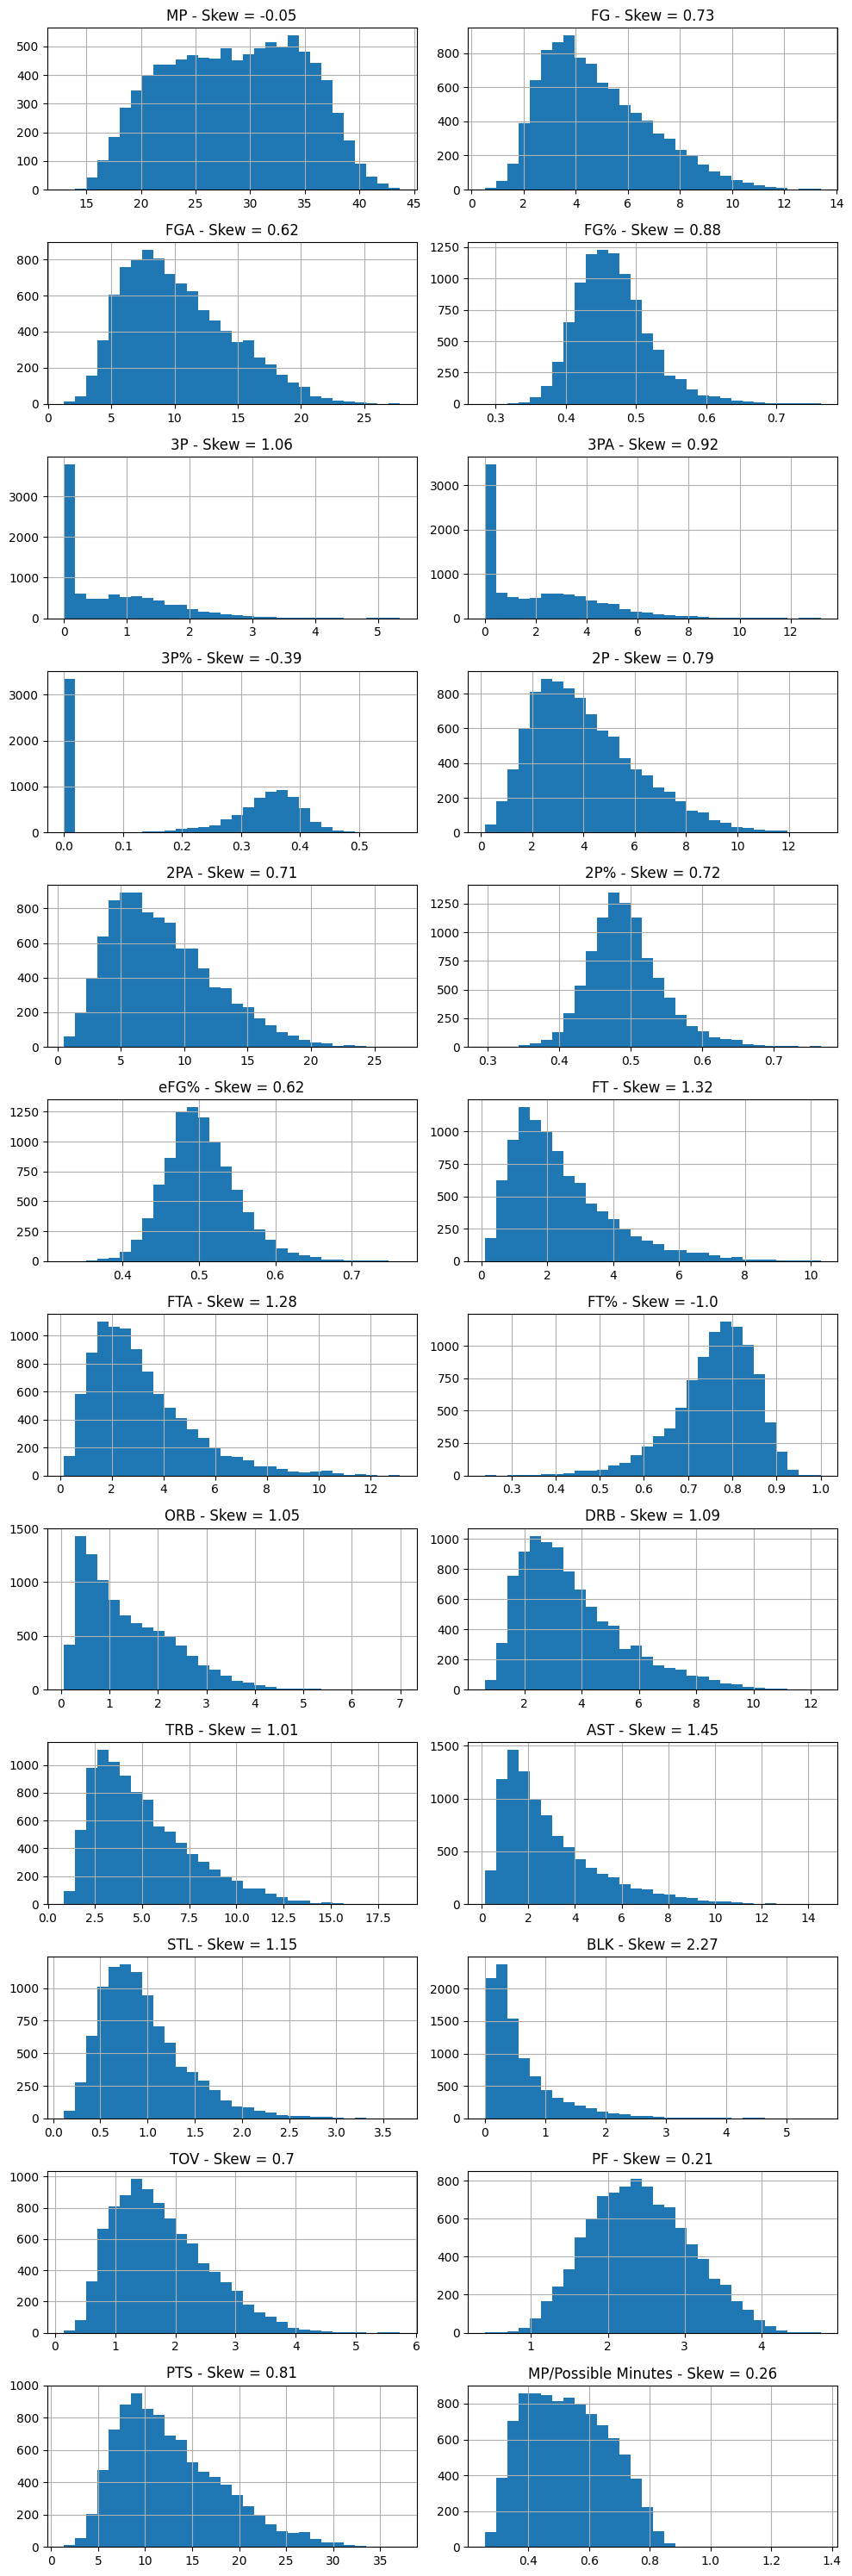

In [26]:
# Configuração das subplots

fig, axs = plt.subplots(nrows=int(len(columns_hist)/2), ncols=2, figsize=(10, 30))

# Loop para criar os gráficos
for n, col in enumerate(columns_hist):
    # Converter o índice 'n' em índices de linha e coluna
    row = n // 2
    col_idx = n % 2
    df[col].hist(ax=axs[row, col_idx], bins=30, )  # Corrigir a referência ao 'ax' correto
    skew = round(df[col].skew(), 2)
    axs[row, col_idx].set_title(f'{col} - Skew = {skew}')  # Adiciona o nome da coluna como título de cada gráfico

plt.tight_layout()
plt.show()


### Boxplots

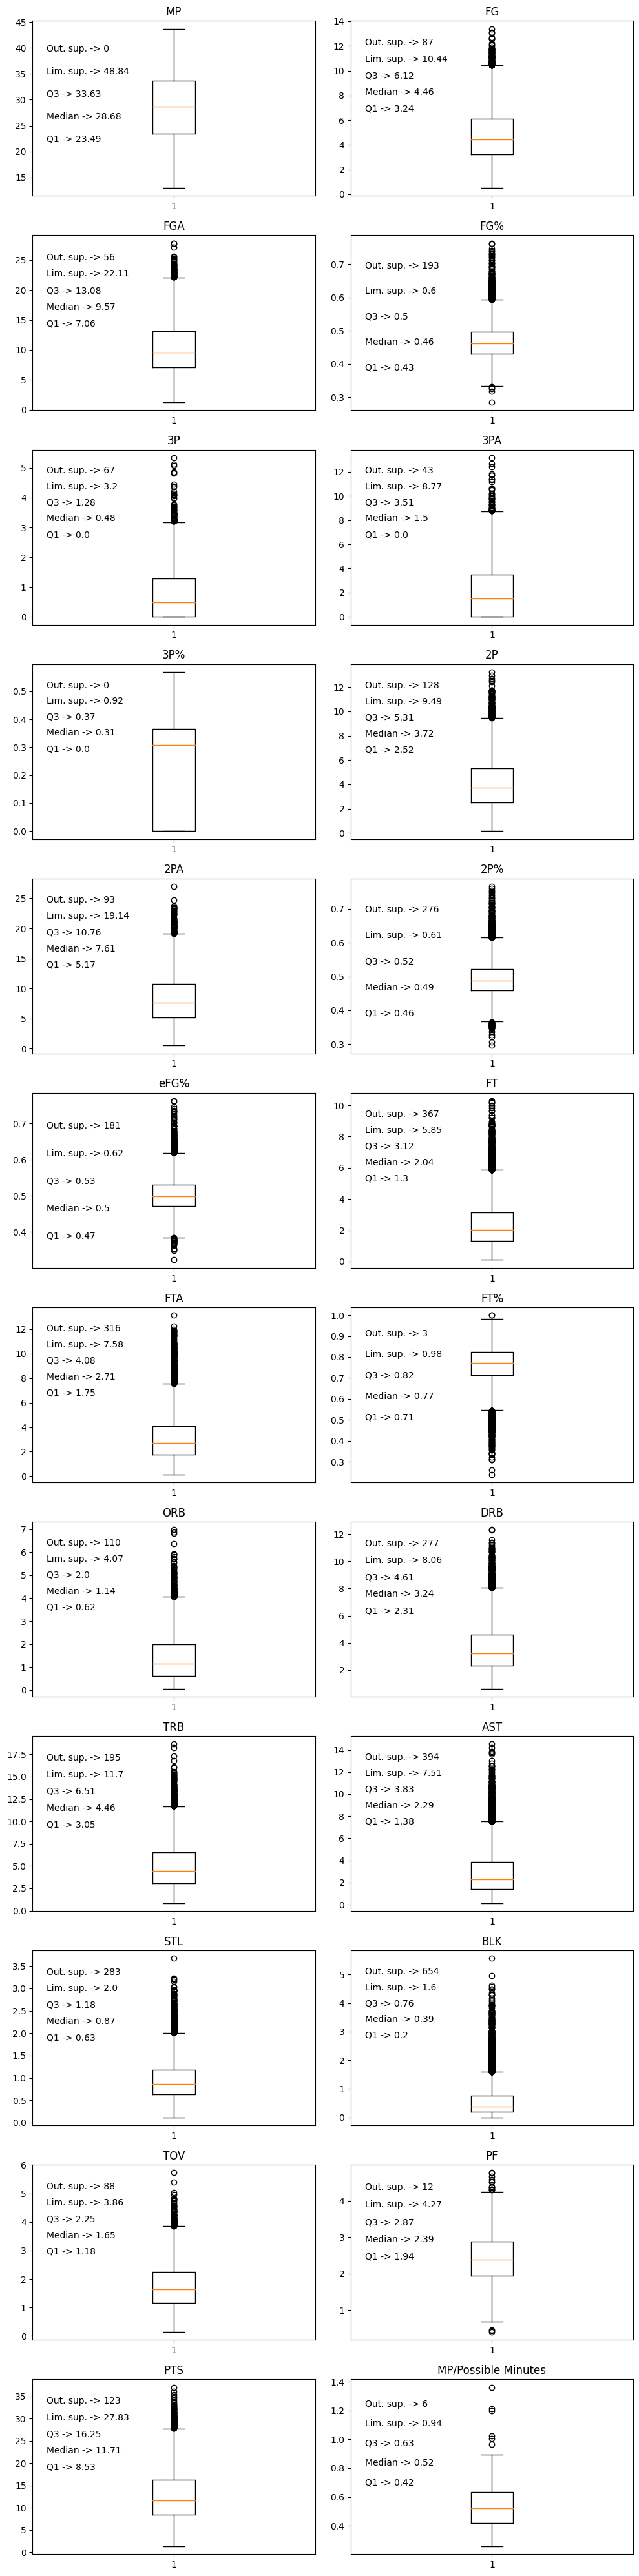

In [27]:
# Configuração das subplots

fig, axs = plt.subplots(nrows=int(len(columns_hist)/2), ncols=2, figsize=(10, 40))

# Loop para criar os gráficos
for n, col in enumerate(columns_hist):
    
    
    # Converter o índice 'n' em índices de linha e coluna
    row = n // 2
    col_idx = n % 2
    axs[row, col_idx].boxplot(df[col])  # Corrigir a referência ao 'ax' correto
    axs[row, col_idx].set_title(f'{col}')  # Adiciona o nome da coluna como título de cada gráfico

    #Calculando dados do boxplot
    q1 = round(df[col].quantile(0.25),2)
    median = round(df[col].quantile(0.50),2)
    q3 = round(df[col].quantile(0.75),2)
    iqr = q3 - q1
    limite_superior = round(q3 + 1.5*iqr,2)
    outliers_superior = df[df[col] > limite_superior]['PTS'].count()
    
    # Adicionando texto no gráfico
    col_max = df[col].max()
    axs[row, col_idx].text(0.55,((col_max)-0.1*col_max),f"Out. sup. -> {outliers_superior}")        
    axs[row, col_idx].text(0.55,((col_max)-0.2*col_max),f"Lim. sup. -> {limite_superior}")    
    axs[row, col_idx].text(0.55,((col_max)-0.3*col_max),f"Q3 -> {q3}")
    axs[row, col_idx].text(0.55,((col_max)-0.4*col_max),f"Median -> {median}")
    axs[row, col_idx].text(0.55,((col_max)-0.5*col_max),f"Q1 -> {q1}")
    
plt.tight_layout()
plt.show()

### Conclusão

1) Em Geral as variáveis tem distribuição normal (Exceção de BLK)

2) Todas as variáveis possuem Outliers, que são importante para a caracterização do perfil dos jogadores

3) Para manter a importância dos outilers o melhor método de escalonamento é o Standart Scaler

## Tratamentos finais para a clusterização

### Criação de uma chave indentificadora e transformação em index

In [28]:
df['key'] = df['Season'].astype(str) + " - " + df['Player']

In [29]:
df.set_index('key', inplace=True)

### Criando uma Df numérica

In [30]:
numeric_df = df.iloc[:,5:].copy()

In [31]:
numeric_df

MP        FG        FGA       FG%  \
key                                                                     
1980 - Brian Taylor          35.307692  5.358974  11.474359  0.467039   
1980 - Rick Barry            25.222222  4.513889  10.708333  0.421530   
1980 - Chris Ford            28.972603  4.520548   9.712329  0.465444   
1980 - Mike Newlin           32.179487  7.833333  17.038462  0.459744   
1980 - Larry Bird            36.036585  8.451220  17.841463  0.473684   
...                                ...       ...        ...       ...   
2024 - Kevon Looney          16.148649  1.878378   3.148649  0.596567   
2024 - Trayce Jackson-Davis  16.617647  3.426471   4.882353  0.701807   
2024 - Daniel Gafford        24.527027  4.702703   6.486486  0.725000   
2024 - Ivica Zubac           26.382353  4.955882   7.632353  0.649326   
2024 - Jakob Poeltl          26.380000  4.960000   7.560000  0.656085   

                                   3P       3PA       3P%        2P  \
key                                                                   
1980 - Brian Taylor          1.153846  3.064103  0.376569  4.205128   
1980 - Rick Barry            1.013889  3.069444  0.330317  3.500000   
1980 - Chris Ford            0.958904  2.246575  0.426829  3.561644   
1980 - Mike Newlin           0.576923  1.948718  0.296053  7.256410   
1980 - Larry Bird            0.707317  1.743902  0.405594  7.743902   
...                               ...       ...       ...       ...   
2024 - Kevon Looney          0.000000  0.000000  0.000000  1.878378   
2024 - Trayce Jackson-Davis  0.000000  0.000000  0.000000  3.426471   
2024 - Daniel Gafford        0.000000  0.000000  0.000000  4.702703   
2024 - Ivica Zubac           0.000000  0.000000  0.000000  4.955882   
2024 - Jakob Poeltl          0.000000  0.000000  0.000000  4.960000   

                                   2PA       2P%      eFG%        FT  \
key                                                                    
1980 - Brian Taylor           8.410256  0.500000  0.517318  1.666667   
1980 - Rick Barry             7.638889  0.458182  0.468872  1.986111   
1980 - Chris Ford             7.465753  0.477064  0.514810  1.178082   
1980 - Mike Newlin           15.089744  0.480884  0.476674  4.705128   
1980 - Larry Bird            16.097561  0.481061  0.493506  3.670732   
...                                ...       ...       ...       ...   
2024 - Kevon Looney           3.135135  0.599138  0.596567  0.756757   
2024 - Trayce Jackson-Davis   4.867647  0.703927  0.701807  1.088235   
2024 - Daniel Gafford         6.486486  0.725000  0.725000  1.594595   
2024 - Ivica Zubac            7.632353  0.649326  0.649326  1.764706   
2024 - Jakob Poeltl           7.560000  0.656085  0.656085  1.180000   

                                  FTA       FT%       ORB       DRB  \
key                                                                   
1980 - Brian Taylor          2.076923  0.802469  0.974359  1.435897   
1980 - Rick Barry            2.125000  0.934641  0.736111  2.541667   
1980 - Chris Ford            1.561644  0.754386  1.054795  1.424658   
1980 - Mike Newlin           5.320513  0.884337  1.294872  2.089744   
1980 - Larry Bird            4.390244  0.836111  2.634146  7.756098   
...                               ...       ...       ...       ...   
2024 - Kevon Looney          1.121622  0.674699  1.932432  3.729730   
2024 - Trayce Jackson-Davis  1.941176  0.560606  1.985294  3.029412   
2024 - Daniel Gafford        2.364865  0.674286  2.635135  4.959459   
2024 - Ivica Zubac           2.441176  0.722892  2.882353  6.323529   
2024 - Jakob Poeltl          2.140000  0.551402  2.920000  5.660000   

                                   TRB       AST       STL       BLK  \
key                                                                    
1980 - Brian Taylor           2.410256  4.294872  1.884615  0.320513   
1980 - Rick Barry             3.277778  3.722222  1.111111  0.388889   
1980 - Chris 

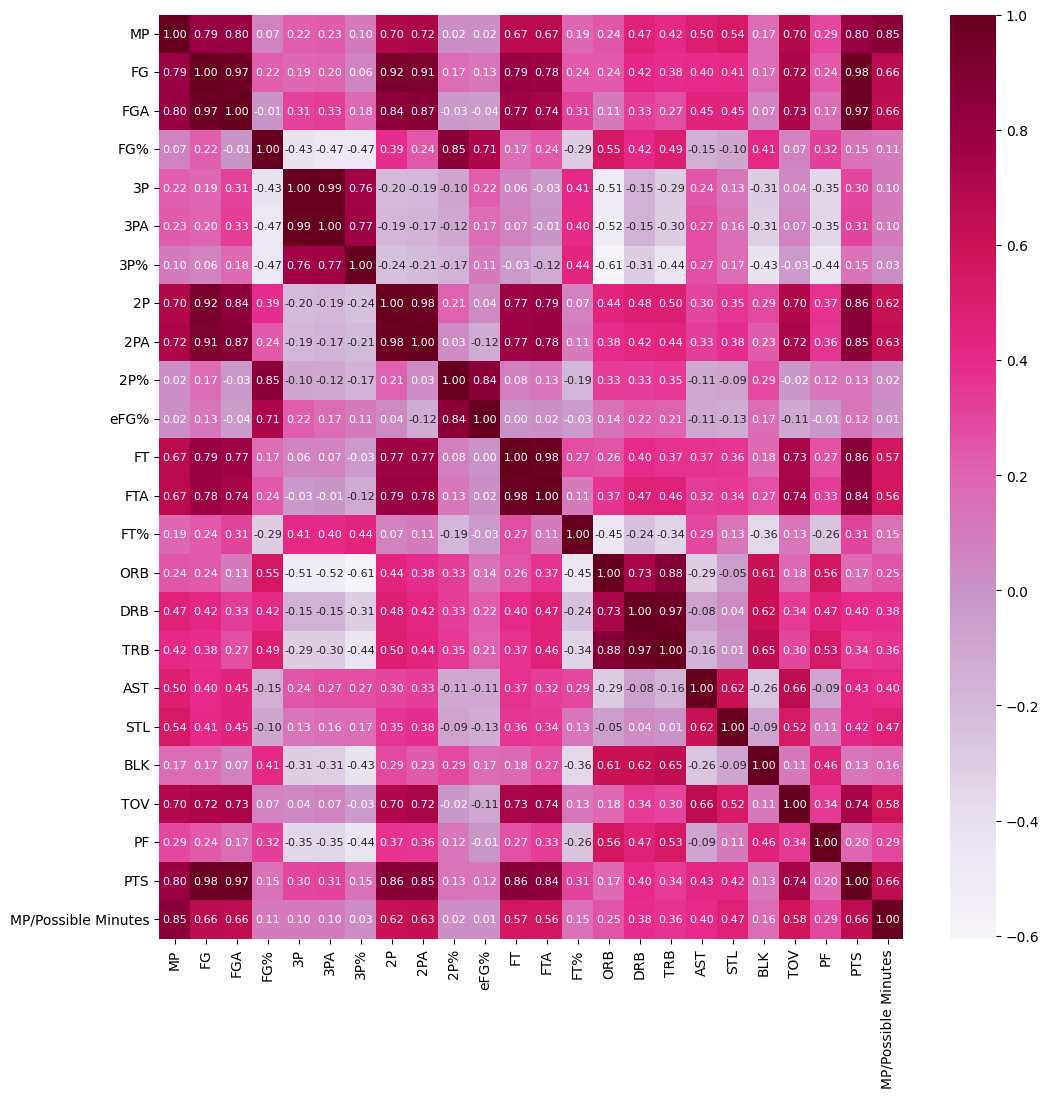

In [32]:
plt.figure(figsize=(12,12))

sns.heatmap(numeric_df.corr(),
            annot = True,
            annot_kws = {"fontsize":8},
            cmap='PuRd',
            fmt=".2f");

### Removendo variáveis reduntandes

In [33]:
numeric_df.drop(columns=['FG', '3P', '2P', '2PA','2P%','FT','ORB','DRB','PF'], inplace=True)
numeric_df

MP        FGA       FG%       3PA  \
key                                                                     
1980 - Brian Taylor          35.307692  11.474359  0.467039  3.064103   
1980 - Rick Barry            25.222222  10.708333  0.421530  3.069444   
1980 - Chris Ford            28.972603   9.712329  0.465444  2.246575   
1980 - Mike Newlin           32.179487  17.038462  0.459744  1.948718   
1980 - Larry Bird            36.036585  17.841463  0.473684  1.743902   
...                                ...        ...       ...       ...   
2024 - Kevon Looney          16.148649   3.148649  0.596567  0.000000   
2024 - Trayce Jackson-Davis  16.617647   4.882353  0.701807  0.000000   
2024 - Daniel Gafford        24.527027   6.486486  0.725000  0.000000   
2024 - Ivica Zubac           26.382353   7.632353  0.649326  0.000000   
2024 - Jakob Poeltl          26.380000   7.560000  0.656085  0.000000   

                                  3P%      eFG%       FTA       FT%  \
key                                                                   
1980 - Brian Taylor          0.376569  0.517318  2.076923  0.802469   
1980 - Rick Barry            0.330317  0.468872  2.125000  0.934641   
1980 - Chris Ford            0.426829  0.514810  1.561644  0.754386   
1980 - Mike Newlin           0.296053  0.476674  5.320513  0.884337   
1980 - Larry Bird            0.405594  0.493506  4.390244  0.836111   
...                               ...       ...       ...       ...   
2024 - Kevon Looney          0.000000  0.596567  1.121622  0.674699   
2024 - Trayce Jackson-Davis  0.000000  0.701807  1.941176  0.560606   
2024 - Daniel Gafford        0.000000  0.725000  2.364865  0.674286   
2024 - Ivica Zubac           0.000000  0.649326  2.441176  0.722892   
2024 - Jakob Poeltl          0.000000  0.656085  2.140000  0.551402   

                                   TRB       AST       STL       BLK  \
key                                                                    
1980 - Brian Taylor           2.410256  4.294872  1.884615  0.320513   
1980 - Rick Barry             3.277778  3.722222  1.111111  0.388889   
1980 - Chris Ford             2.479452  2.945205  1.520548  0.369863   
1980 - Mike Newlin            3.384615  4.025641  1.474359  0.051282   
1980 - Larry Bird            10.390244  4.512195  1.743902  0.646341   
...                                ...       ...       ...       ...   
2024 - Kevon Looney           5.662162  1.797297  0.378378  0.391892   
2024 - Trayce Jackson-Davis   5.014706  1.205882  0.426471  1.117647   
2024 - Daniel Gafford         7.594595  1.554054  0.878378  2.067568   
2024 - Ivica Zubac            9.205882  1.367647  0.323529  1.220588   
2024 - Jakob Poeltl           8.580000  2.540000  0.700000  1.520000   

                                  TOV        PTS  MP/Possible Minutes  
key                                                                    
1980 - Brian Taylor          1.807692  13.538462             0.694402  
1980 - Rick Barry            2.111111  12.027778             0.457892  
1980 - Chris Ford            1.438356  11.178082             0.533283  
1980 - Mike Newlin           2.961538  20.948718             0.632879  
1980 - Larry Bird            3.207317  21.280488             0.745083  
...                               ...        ...                  ...  
2024 - Kevon Looney          0.675676   4.513514             0.301906  
2024 - Trayce Jackson-Davis  0.720588   7.941176             0.285484  
2024 - Daniel Gafford        1.000000  11.000000             0.458543  
2024 - Ivica Zubac           1.161765  11.676471             0.453238  
2024 - Jakob Poeltl          1.540000  11.100000             0.333233  

[9446 rows x 15 columns]

### Escalonando as variáveis

In [34]:
scaler = StandardScaler()
numeric_scaled = pd.DataFrame(scaler.fit_transform(numeric_df),
                              columns=numeric_df.columns, 
                              index = numeric_df.index)
numeric_scaled

MP       FGA       FG%       3PA       3P%  \
key                                                                             
1980 - Brian Taylor          1.101434  0.273041 -0.005902  0.481553  0.900924   
1980 - Rick Barry           -0.538691  0.091739 -0.868350  0.484047  0.631251   
1980 - Chris Ford            0.071205 -0.143993 -0.036126  0.099748  1.193965   
1980 - Mike Newlin           0.592717  1.589941 -0.144150 -0.039358  0.431475   
1980 - Larry Bird            1.219968  1.779994  0.120032 -0.135012  1.070156   
...                               ...       ...       ...       ...       ...   
2024 - Kevon Looney         -2.014258 -1.697471  2.448812 -0.949455 -1.294653   
2024 - Trayce Jackson-Davis -1.937989 -1.287142  4.443261 -0.949455 -1.294653   
2024 - Daniel Gafford       -0.651745 -0.907479  4.882794 -0.949455 -1.294653   
2024 - Ivica Zubac          -0.350028 -0.636277  3.448666 -0.949455 -1.294653   
2024 - Jakob Poeltl         -0.350410 -0.653402  3.576758 -0.949455 -1.294653   

                                 eFG%       FTA       FT%       TRB       AST  \
key                                                                             
1980 - Brian Taylor          0.284708 -0.558026  0.465338 -1.016326  0.675239   
1980 - Rick Barry           -0.730605 -0.532823  1.915164 -0.682577  0.399217   
1980 - Chris Ford            0.232130 -0.828152 -0.062100 -0.989705  0.024689   
1980 - Mike Newlin          -0.567084  1.142368  1.363374 -0.641475  0.545468   
1980 - Larry Bird           -0.214325  0.654691  0.834366  2.053699  0.779991   
...                               ...       ...       ...       ...       ...   
2024 - Kevon Looney          1.945531 -1.058826 -0.936212  0.234733 -0.528613   
2024 - Trayce Jackson-Davis  4.151087 -0.629189 -2.187728 -0.014354 -0.813680   
2024 - Daniel Gafford        4.637144 -0.407078 -0.940743  0.978170 -0.645858   
2024 - Ivica Zubac           3.051217 -0.367073 -0.407572  1.598057 -0.735708   
2024 - Jakob Poeltl          3.192867 -0.524959 -2.288692  1.357270 -0.170624   

                                  STL       BLK       TOV       PTS  \
key                                                                   
1980 - Brian Taylor          2.078089 -0.449307  0.048276  0.133992   
1980 - Rick Barry            0.353881 -0.334046  0.438995 -0.136306   
1980 - Chris Ford            1.266551 -0.366118 -0.427326 -0.288337   
1980 - Mike Newlin           1.163592 -0.903148  1.534109  1.459866   
1980 - Larry Bird            1.764427  0.099941  1.850604  1.519227   
...                               ...       ...       ...       ...   
2024 - Kevon Looney         -1.279443 -0.328984 -1.409446 -1.480789   
2024 - Trayce Jackson-Davis -1.172241  0.894418 -1.351612 -0.867497   
2024 - Daniel Gafford       -0.164900  2.495695 -0.991807 -0.320200   
2024 - Ivica Zubac          -1.401706  1.067946 -0.783499 -0.199163   
2024 - Jakob Poeltl         -0.562520  1.572663 -0.296437 -0.302308   

                             MP/Possible Minutes  
key                                               
1980 - Brian Taylor                     1.216259  
1980 - Rick Barry                      -0.536236  
1980 - Chris Ford                       0.022395  
1980 - Mike Newlin                      0.760386  
1980 - Larry Bird                       1.591794  
...                                          ...  
2024 - Kevon Looney                    -1.692064  
2024 - Trayce Jackson-Davis            -1.813745  
2024 - Daniel Gafford                  -0.531411  
2024 - Ivica Zubac                     -0.570723  
2024 - Jakob Poeltl                    -1.459933  

[9446 rows x 15 columns]

# Entendendo o PCA da base

Aplicando PCA para entender quantas variáveis usae

In [35]:
pca = PCA()
pca.fit(numeric_scaled)

PCA()

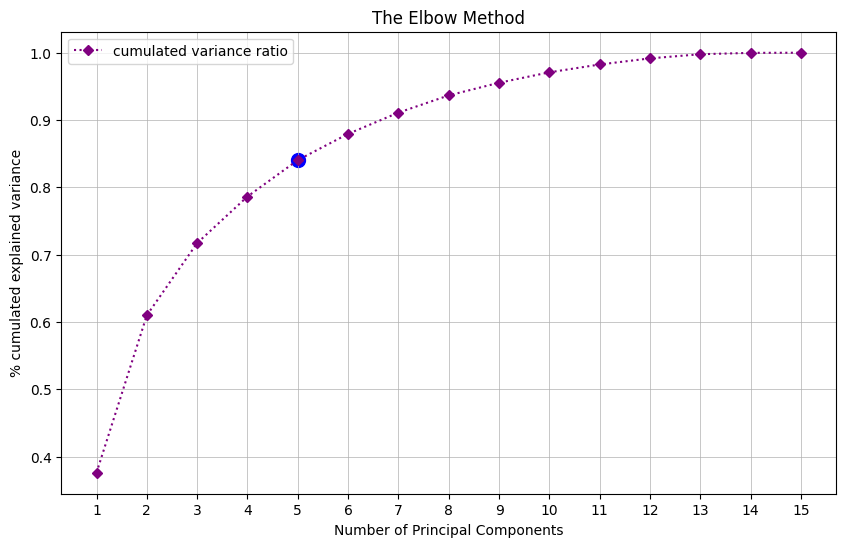

In [36]:
pca_groups = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(10,6))
    # getting axes
    ax = plt.gca()
    # plotting
    explained_variance_ratio_cumulated = np.cumsum(pca.explained_variance_ratio_)
    x_axis_ticks = np.arange(1,explained_variance_ratio_cumulated.shape[0]+1)
    ax.plot(x_axis_ticks,explained_variance_ratio_cumulated,label="cumulated variance ratio",color="purple",linestyle=":",marker="D",markersize=5)
    # customizing
    ax.set_xlabel('Number of Principal Components')
    ax.set_ylabel('% cumulated explained variance')
    ax.legend(loc="upper left")
    ax.set_title('The Elbow Method')
    ax.set_xticks(x_axis_ticks)
    ax.scatter(pca_groups,explained_variance_ratio_cumulated[pca_groups-1],c='blue',s=100)
    ax.grid(axis="x",linewidth=0.5)
    ax.grid(axis="y",linewidth=0.5)

# Realizando o clustering com PCA = 3

### Limitando o PCA para 3 variáveis

In [39]:
threhsold_pca = 3
pca3 = PCA(n_components=threhsold_pca, whiten=True)
pca3.fit(numeric_scaled)
pca3_nba_proj = pd.DataFrame(pca3.transform(numeric_scaled),index = numeric_scaled.index)
pca3_nba_proj

0         1         2
key                                                      
1980 - Brian Taylor          0.639099  0.856443  0.128190
1980 - Rick Barry           -0.028954  1.149195 -0.273450
1980 - Chris Ford           -0.138635  0.707318  0.238024
1980 - Mike Newlin           1.297461  0.713552 -0.423509
1980 - Larry Bird            1.807540 -0.078088 -0.120342
...                               ...       ...       ...
2024 - Kevon Looney         -1.726360 -1.257205  1.288548
2024 - Trayce Jackson-Davis -1.531478 -2.340582  2.978221
2024 - Daniel Gafford       -0.608700 -2.829383  3.413702
2024 - Ivica Zubac          -0.598053 -2.225444  2.419051
2024 - Jakob Poeltl         -0.634785 -2.484357  2.032285

[9446 rows x 3 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 4

In [40]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [41]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca3_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


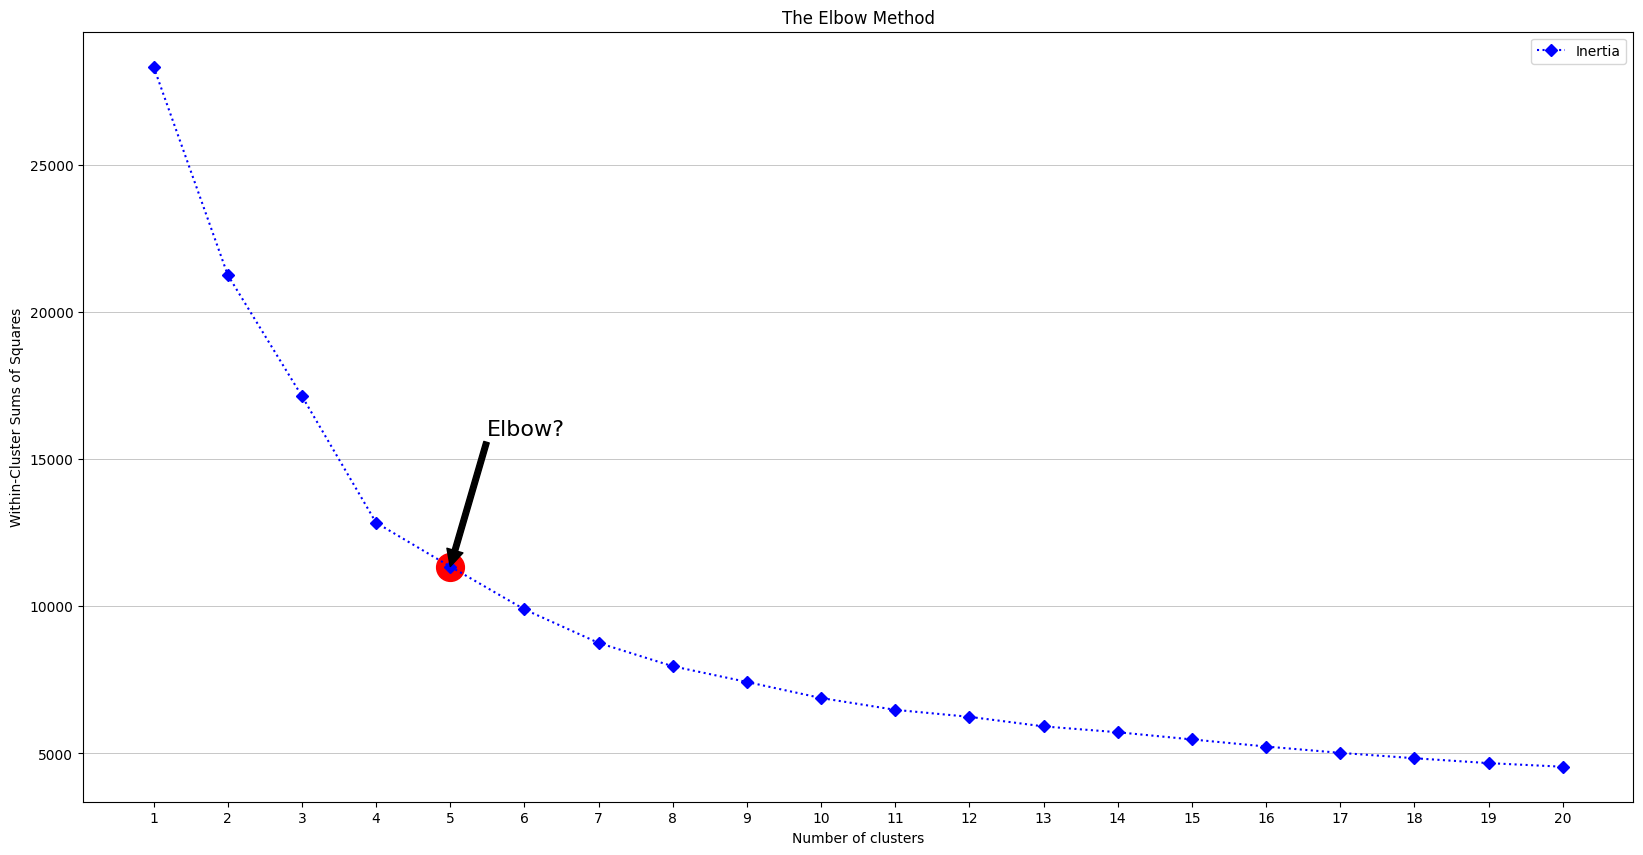

In [42]:
elbow_highlight = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Realizando o clustering com PCA = 4

Limitando o PCA para 4 variáveis

In [43]:
threhsold_pca = 4
pca4 = PCA(n_components=threhsold_pca, whiten=True)
pca4.fit(numeric_scaled)
pca4_nba_proj = pd.DataFrame(pca4.transform(numeric_scaled),index = numeric_scaled.index)
pca4_nba_proj

0         1         2         3
key                                                                
1980 - Brian Taylor          0.639099  0.856443  0.128190  1.284879
1980 - Rick Barry           -0.028954  1.149195 -0.273450 -0.165671
1980 - Chris Ford           -0.138635  0.707318  0.238024  0.893953
1980 - Mike Newlin           1.297461  0.713552 -0.423509  0.249423
1980 - Larry Bird            1.807540 -0.078088 -0.120342 -0.065179
...                               ...       ...       ...       ...
2024 - Kevon Looney         -1.726360 -1.257205  1.288548  1.944904
2024 - Trayce Jackson-Davis -1.531478 -2.340582  2.978221  2.969428
2024 - Daniel Gafford       -0.608700 -2.829383  3.413702  2.753541
2024 - Ivica Zubac          -0.598053 -2.225444  2.419051  1.269309
2024 - Jakob Poeltl         -0.634785 -2.484357  2.032285  2.187214

[9446 rows x 4 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 5

In [44]:
nb_clusters_to_try = np.arange(1,20+1,1)
nb_clusters_to_try

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])

In [55]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca4_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


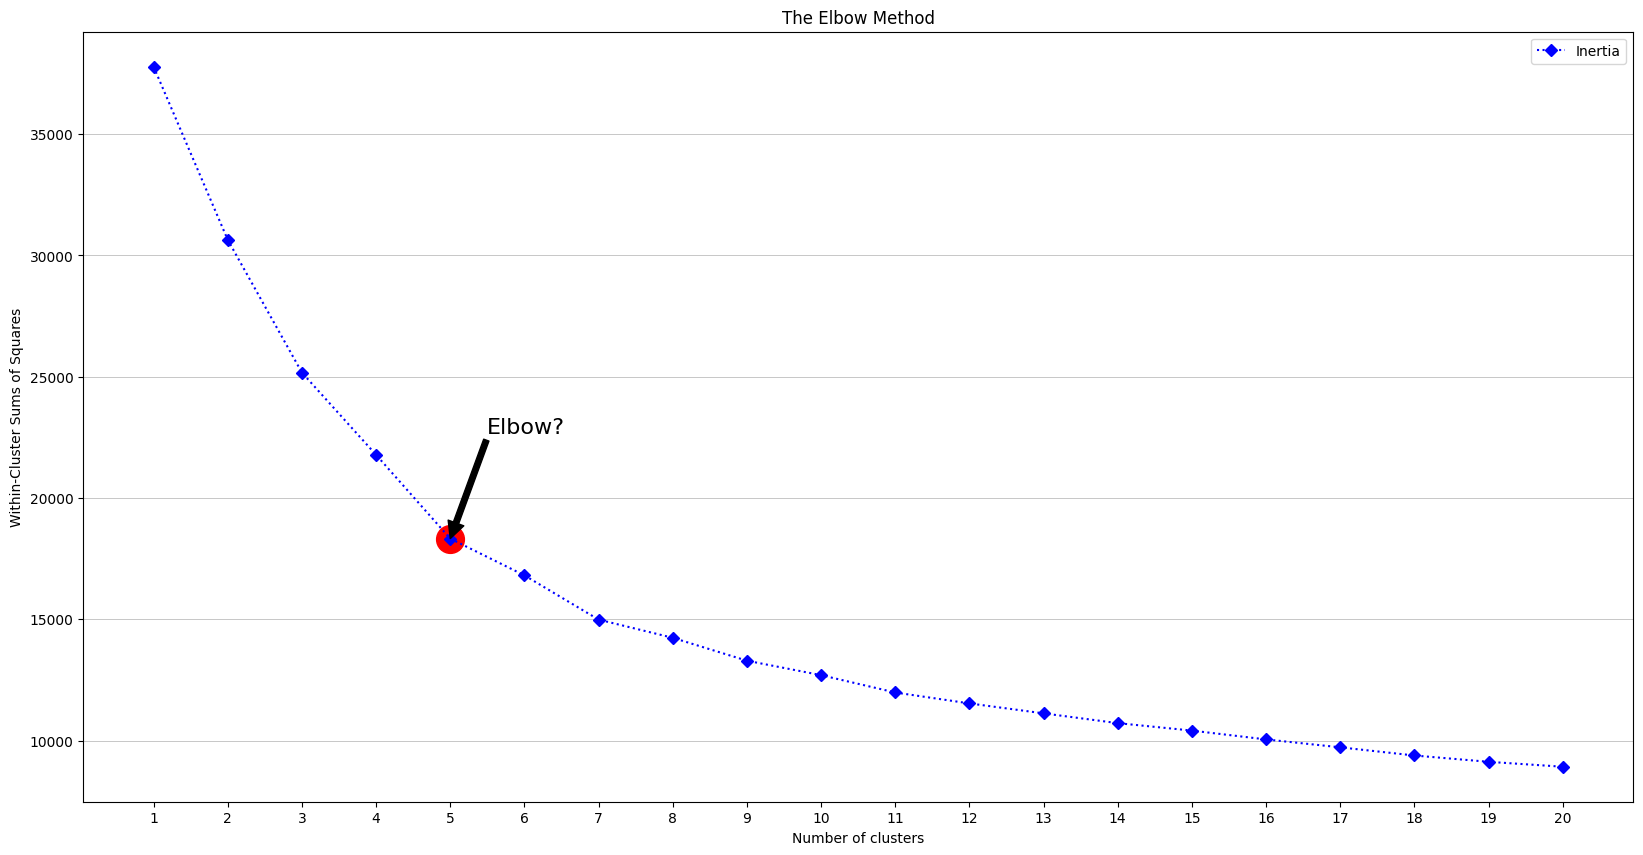

In [56]:
elbow_highlight = 5
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Realizando o clustering com PCA = 5

In [47]:
threhsold_pca = 5
pca5 = PCA(n_components=threhsold_pca, whiten=True)
pca5.fit(numeric_scaled)
pca5_nba_proj = pd.DataFrame(pca5.transform(numeric_scaled),index = numeric_scaled.index)
pca5_nba_proj

0         1         2         3         4
key                                                                          
1980 - Brian Taylor          0.639099  0.856443  0.128190  1.284879 -1.204957
1980 - Rick Barry           -0.028954  1.149195 -0.273450 -0.165671  0.907086
1980 - Chris Ford           -0.138635  0.707318  0.238024  0.893953 -1.024657
1980 - Mike Newlin           1.297461  0.713552 -0.423509  0.249423  1.490068
1980 - Larry Bird            1.807540 -0.078088 -0.120342 -0.065179 -0.491047
...                               ...       ...       ...       ...       ...
2024 - Kevon Looney         -1.726360 -1.257205  1.288548  1.944904  0.815510
2024 - Trayce Jackson-Davis -1.531478 -2.340582  2.978221  2.969428  0.296949
2024 - Daniel Gafford       -0.608700 -2.829383  3.413702  2.753541 -0.194407
2024 - Ivica Zubac          -0.598053 -2.225444  2.419051  1.269309  0.794957
2024 - Jakob Poeltl         -0.634785 -2.484357  2.032285  2.187214 -0.725064

[9446 rows x 5 columns]

## Aplicando o K means para descobrir o número de grupos com PCA = 5

In [48]:
# Apply the elbow method to find the optimal number of clusters.

wcss = []

for K in nb_clusters_to_try:
    print('working with ' + str(K) + ' clusters...', flush=True)
    kmeans = KMeans(n_clusters = K)
    kmeans.fit(pca5_nba_proj)
    wcss.append(kmeans.inertia_)
print("DONE !")

working with 1 clusters...
working with 2 clusters...
working with 3 clusters...
working with 4 clusters...
working with 5 clusters...
working with 6 clusters...
working with 7 clusters...
working with 8 clusters...
working with 9 clusters...
working with 10 clusters...
working with 11 clusters...
working with 12 clusters...
working with 13 clusters...
working with 14 clusters...
working with 15 clusters...
working with 16 clusters...
working with 17 clusters...
working with 18 clusters...
working with 19 clusters...
working with 20 clusters...
DONE !


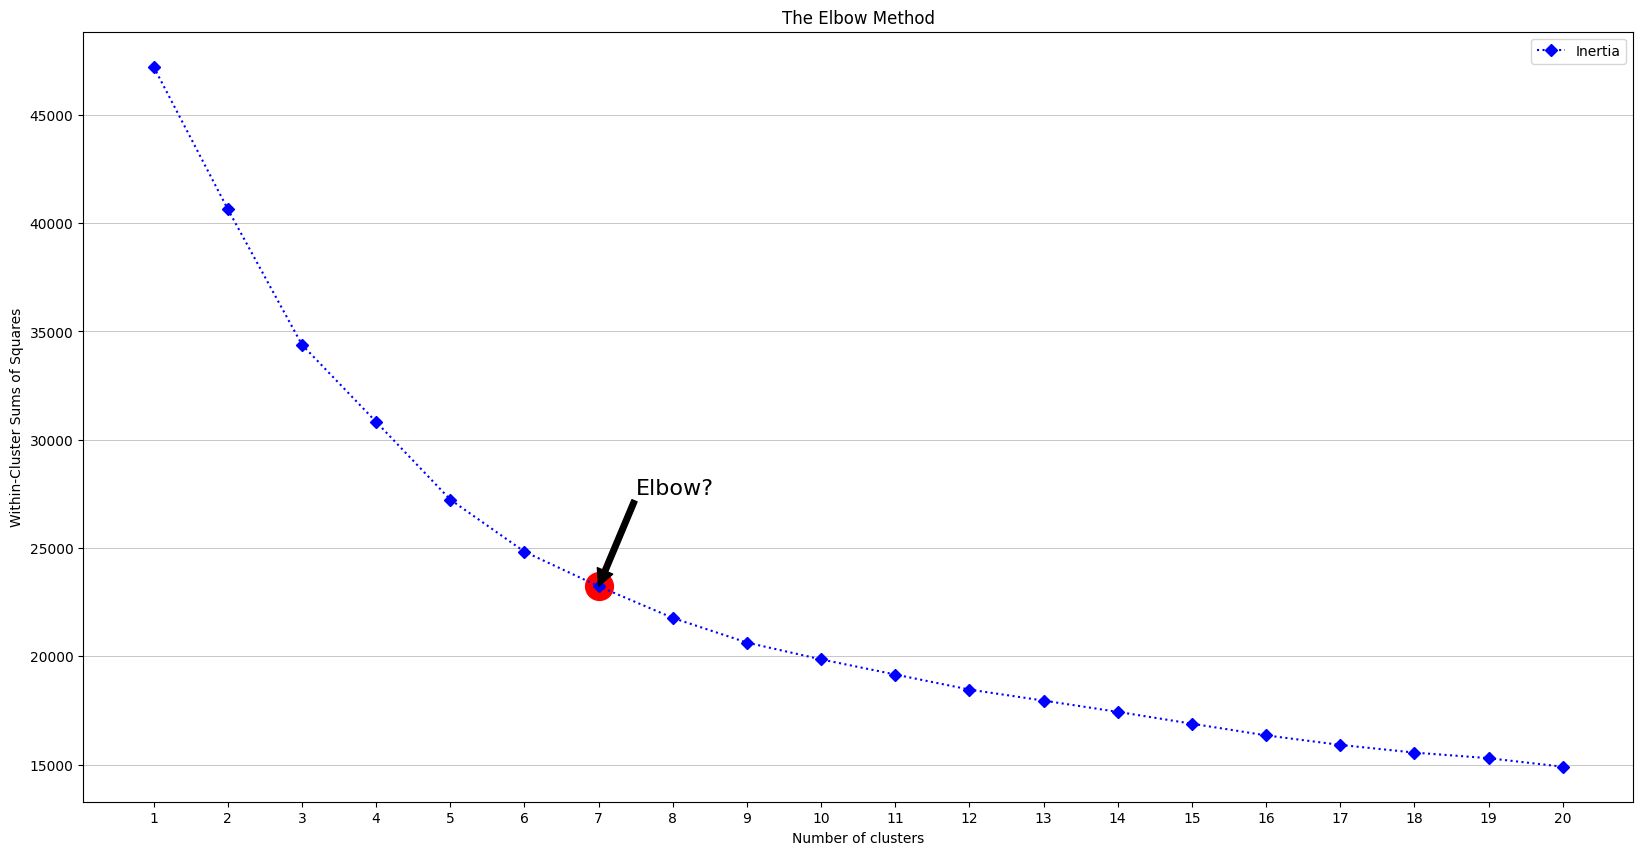

In [49]:
elbow_highlight = 7
with plt.style.context('seaborn-deep'):
    # figsize
    plt.figure(figsize=(20,10))
    # getting axes
    ax = plt.gca()
    # plotting
    ax.plot(nb_clusters_to_try, wcss,color="blue",linestyle=":",marker="D",label="Inertia")
    # customizing
    ax.legend(loc="upper right")
    ax.set_title('The Elbow Method')
    ax.set_xticks(nb_clusters_to_try)
    ax.set_xlabel('Number of clusters')
    ax.set_ylabel('Within-Cluster Sums of Squares')
    ax.scatter(elbow_highlight,wcss[elbow_highlight-1],c='red',s=400)    
    # annotate
    ax.annotate("Elbow?", 
                (elbow_highlight,wcss[elbow_highlight-1]),
                (elbow_highlight+0.50,wcss[elbow_highlight-1]+5000), 
                arrowprops=dict(facecolor='black'),
                fontsize=16,
#                horizontalalignment='middle', 
                verticalalignment='top')
    
    ax.grid(axis="y",linewidth=0.5)
    plt.show()

# Criando Pipelines para testar agrupamentos

## PCA = 3 & Grupos = 4

In [51]:
from sklearn.pipeline import make_pipeline

pipeline_pca3_cluster4 = make_pipeline(
    PCA(n_components=3),
    KMeans(n_clusters=4)
)

pipeline_pca3_cluster4.fit(numeric_scaled)

Pipeline(steps=[('pca', PCA(n_components=3)), ('kmeans', KMeans(n_clusters=4))])

In [52]:
labels_1 = pd.DataFrame(pipeline_pca3_cluster4.predict(numeric_scaled), index=numeric_scaled.index)
df = pd.concat([df,labels_1],axis=1).rename(columns={0:"labels_1"})
df.labels_1.value_counts(normalize=True)

3    0.386407
0    0.251535
1    0.210354
2    0.151704
Name: labels_1, dtype: float64

In [53]:
numeric_scaled = pd.concat([numeric_scaled,labels_1],axis=1).rename(columns={0:"labels_1"})
numeric_scaled.labels_1.value_counts(normalize=True)

3    0.386407
0    0.251535
1    0.210354
2    0.151704
Name: labels_1, dtype: float64

## PCA = 4 & Grupos = 5

In [57]:
from sklearn.pipeline import make_pipeline
    
pipeline_pca4_cluster5 = make_pipeline(
    PCA(n_components=4, random_state=0),
    KMeans(n_clusters=5)
)

pipeline_pca4_cluster5.fit(numeric_scaled)

Pipeline(steps=[('pca', PCA(n_components=4, random_state=0)),
                ('kmeans', KMeans(n_clusters=5))])

In [58]:
labels_2 = pd.DataFrame(pipeline_pca4_cluster5.predict(numeric_scaled), index=numeric_scaled.index)
df = pd.concat([df,labels_2],axis=1).rename(columns={0:"labels_2"})
df.labels_2.value_counts(normalize=True)

1    0.382702
2    0.207389
3    0.160279
4    0.152022
0    0.097607
Name: labels_2, dtype: float64

In [59]:
numeric_scaled = pd.concat([numeric_scaled,labels_2],axis=1).rename(columns={0:"labels_2"})
numeric_scaled.labels_2.value_counts(normalize=True)

1    0.382702
2    0.207389
3    0.160279
4    0.152022
0    0.097607
Name: labels_2, dtype: float64

## PCA = 5 & Grupos = 7

In [62]:
from sklearn.pipeline import make_pipeline
    
pipeline_pca5_cluster7 = make_pipeline(
    PCA(n_components=5, random_state=0),
    KMeans(n_clusters=7)
)

pipeline_pca5_cluster7.fit(numeric_scaled)

Pipeline(steps=[('pca', PCA(n_components=5, random_state=0)),
                ('kmeans', KMeans(n_clusters=7))])

In [63]:
labels_3 = pd.DataFrame(pipeline_pca5_cluster7.predict(numeric_scaled), index=numeric_scaled.index)
df = pd.concat([df,labels_3],axis=1).rename(columns={0:"labels_3"})
df.labels_3.value_counts()

5    1921
2    1907
1    1747
4    1423
3     920
6     801
0     727
Name: labels_3, dtype: int64

In [64]:
numeric_scaled = pd.concat([numeric_scaled,labels_3],axis=1).rename(columns={0:"labels_3"})
numeric_scaled.labels_3.value_counts(normalize=True)

5    0.203367
2    0.201884
1    0.184946
4    0.150646
3    0.097396
6    0.084798
0    0.076964
Name: labels_3, dtype: float64

# Visualização dos grupos

In [65]:
df.groupby('labels_1').mean()

Season        Age          G         GS         MP        FG  \
labels_1                                                                      
0         2004.065236  28.460017  72.206229  66.672138  34.817968  6.762190   
1         2001.153498  29.322597  73.109713  37.416205  23.788188  3.379011   
2         1997.741800  27.770412  73.958828  65.192603  33.619865  6.632576   
3         2007.777534  30.179452  70.951781  31.846575  25.032143  3.632698   

                FGA       FG%        3P       3PA       3P%        2P  \
labels_1                                                                
0         14.848776  0.454604  1.280326  3.553903  0.322329  5.479223   
1          6.744674  0.504139  0.045002  0.140984  0.031637  3.322834   
2         12.962570  0.513685  0.094795  0.298919  0.054980  6.522953   
3          8.282686  0.437430  1.004402  2.753723  0.326020  2.625447   

                2PA       2P%      eFG%        FT       FTA       FT%  \
labels_1                                                                
0         11.281363  0.484954  0.497951  3.699279  4.562581  0.807462   
1          6.542969  0.512354  0.508300  1.609831  2.340588  0.680928   
2         12.582453  0.520903  0.517808  3.666727  5.041594  0.727329   
3          5.514182  0.478367  0.499486  1.502603  1.906163  0.785098   

               ORB       DRB       TRB       AST       STL       BLK  \
labels_1                                                               
0         1.073990  3.645756  4.719746  5.047281  1.348865  0.395246   
1         2.005287  3.910437  5.915724  1.269675  0.649173  0.864127   
2         2.718323  6.171560  8.889883  2.458319  0.977853  1.266650   
3         0.744510  2.546853  3.291363  2.547569  0.849280  0.294268   

               TOV        PF        PTS  MP/Possible Minutes  labels_2  \
labels_1                                                                 
0         2.511480  2.404898  18.506626             0.647265  1.896886   
1         1.304076  2.682064   8.424029             0.447240  2.089079   
2         2.325577  3.038475  17.041503             0.635576  3.812282   
3         1.323372  2.049704   9.775251             0.457943  1.013151   

          labels_3  
labels_1            
0         3.132576  
1         2.064419  
2         3.863922  
3         3.107397

In [66]:
df.groupby('labels_2').mean()

Season        Age          G         GS         MP        FG  \
labels_2                                                                      
0         2004.585683  27.518438  73.167028  71.605206  36.989348  8.285994   
1         2007.948548  30.199170  70.902628  31.742739  25.014817  3.627738   
2         2001.006126  29.313936  73.200613  36.639612  23.634322  3.369016   
3         2003.145310  28.941876  71.825627  63.457728  33.481059  5.879555   
4         1998.194986  27.889276  73.726323  65.318942  33.437681  6.468928   

                FGA       FG%        3P       3PA       3P%        2P  \
labels_2                                                                
0         17.763288  0.466577  1.411889  3.937833  0.326623  6.872441   
1          8.282216  0.436852  1.013496  2.778161  0.328501  2.611629   
2          6.683208  0.506467  0.040996  0.129520  0.030530  3.316348   
3         13.061311  0.450547  1.148750  3.183153  0.309980  4.726618   
4         12.746750  0.508979  0.103283  0.318170  0.055488  6.351756   

                2PA       2P%      eFG%        FT       FTA       FT%  \
labels_2                                                                
0         13.817078  0.497891  0.506432  5.039454  6.210971  0.811011   
1          5.490620  0.478061  0.499455  1.501208  1.903284  0.785547   
2          6.490518  0.514597  0.510476  1.594918  2.326716  0.679332   
3          9.856613  0.479647  0.494329  2.940812  3.648350  0.802865   
4         12.351701  0.516200  0.513486  3.535560  4.864217  0.728101   

               ORB       DRB       TRB       AST       STL       BLK  \
labels_2                                                               
0         1.354833  4.510909  5.865742  5.416736  1.452642  0.511180   
1         0.744901  2.553365  3.298266  2.520964  0.844839  0.295562   
2         1.976924  3.823840  5.800764  1.321492  0.662480  0.819810   
3         0.941900  3.167452  4.109352  4.860278  1.299154  0.324194   
4         2.721672  6.195207  8.916878  2.285378  0.931614  1.329184   

               TOV        PF        PTS  MP/Possible Minutes  labels_1  \
labels_2                                                                 
0         2.942166  2.497762  23.024994             0.695326  0.093275   
1         1.316489  2.047318   9.772794             0.457296  2.999447   
2         1.306174  2.659876   8.385617             0.444769  1.043900   
3         2.277311  2.365568  15.852858             0.619040  0.051519   
4         2.258292  3.052016  16.590587             0.630986  1.915738   

          labels_3  
labels_2            
0         3.006508  
1         3.123375  
2         1.973456  
3         3.124835  
4         4.013928

In [67]:
df.groupby('labels_3').mean()

Season        Age          G         GS         MP        FG  \
labels_3                                                                      
0         1997.416781  28.535076  72.540578  62.616231  33.182030  5.578681   
1         2003.247281  30.233543  71.423583  25.876359  23.273928  3.163427   
2         2001.115364  29.274253  73.200839  36.901940  23.683684  3.390019   
3         2004.548913  27.493478  73.177174  71.611957  36.996053  8.287469   
4         1998.033732  27.883345  73.763176  65.300773  33.451244  6.467379   
5         2011.912546  30.179594  70.512233  36.921916  26.507137  4.024155   
6         2008.626717  29.337079  71.083645  64.403246  33.750109  6.167240   

                FGA       FG%        3P       3PA       3P%        2P  \
labels_3                                                                
0         12.416056  0.449493  0.568194  1.763736  0.242289  5.001826   
1          7.456885  0.422947  0.555830  1.693681  0.266384  2.601800   
2          6.694965  0.508961  0.040451  0.128043  0.030583  3.338045   
3         17.767692  0.466540  1.409432  3.932508  0.326468  6.876369   
4         12.733267  0.509368  0.091890  0.284839  0.053109  6.361485   
5          8.979003  0.449093  1.403877  3.694536  0.377211  2.620179   
6         13.675650  0.451412  1.682704  4.491808  0.370903  4.484439   

                2PA       2P%      eFG%        FT       FTA       FT%  \
labels_3                                                                
0         10.607406  0.470229  0.473183  2.888334  3.685216  0.779154   
1          5.732443  0.453780  0.463338  1.456918  1.893769  0.764067   
2          6.505120  0.517068  0.512945  1.601180  2.337266  0.678702   
3         13.826789  0.497792  0.506307  5.041962  6.214930  0.810856   
4         12.370993  0.516195  0.513496  3.540316  4.874311  0.727428   
5          5.284223  0.498921  0.530337  1.538974  1.913798  0.803005   
6          9.183306  0.488381  0.513532  2.991003  3.618630  0.824173   

               ORB       DRB       TRB       AST       STL       BLK  \
labels_3                                                               
0         1.000597  2.890376  3.890973  5.858405  1.526147  0.302464   
1         0.730669  2.201940  2.932609  2.742520  0.880227  0.257095   
2         1.994916  3.852216  5.847132  1.312183  0.660297  0.829027   
3         1.354452  4.506618  5.861070  5.423302  1.454136  0.511287   
4         2.729547  6.194757  8.924304  2.285655  0.933173  1.330358   
5         0.771235  2.876554  3.647790  2.300590  0.810720  0.335574   
6         0.910264  3.484216  4.394480  3.898439  1.081633  0.358552   

               TOV        PF        PTS  MP/Possible Minutes  labels_1  \
labels_3                                                                 
0         2.529367  2.492734  14.622551             0.618330  0.092160   
1         1.397062  2.056941   8.345399             0.427779  2.949628   
2         1.307011  2.665099   8.433193             0.445745  1.040902   
3         2.945038  2.498777  23.027999             0.695557  0.093478   
4         2.263098  3.055754  16.580968             0.631509  1.929726   
5         1.242409  2.049558  10.991259             0.482768  2.997918   
6         2.038522  2.255186  17.008286             0.619231  0.008739   

          labels_2  
labels_3            
0         2.995873  
1         1.029765  
2         2.002098  
3         0.000000  
4         4.000000  
5         1.001041  
6         3.007491